In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sub = pd.read_csv('daily_subs_fillna.csv')
content = pd.read_csv('timeline_content_fillna.csv')

In [58]:
sub['YearMonth'] = pd.to_datetime(sub['date'],format='%Y-%m').dt.strftime('%Y-%m')
sub.head()

,date,subs,YearMonth
0,2021-04-01,2973,2021-04
1,2021-04-02,2864,2021-04
2,2021-04-03,3014,2021-04
3,2021-04-04,3118,2021-04
4,2021-04-05,2894,2021-04


In [59]:
content['Month_End'] = pd.to_datetime(content['Month_End'],format='%Y-%m').dt.strftime('%Y-%m')
content['Month_Start'] = pd.to_datetime(content['Month_Start'],format='%Y-%m').dt.strftime('%Y-%m')
content['Movie_Show'] = content['Movie_Show'].astype('string')
content

,Movie_Show,Month_Start,Month_End
0,GM,2022-07,2023-01
1,NC,2023-01,2023-03
2,HV,2023-04,2023-12
3,MT,2023-03,2023-07
4,Nguoi Ay La Ai 2022,2022-05,2022-09
5,2 Ngay 1 Dem,2022-06,2022-10
6,The Masked Singer,2022-07,2022-10
7,Rap Viet 3,2023-05,2023-09
8,Nguoi Ay La Ai 2023,2023-05,2023-08
9,Hanh Trinh Ruc Ro,2023-05,2023-10


In [60]:
df = sub[sub['date'] >= '2022-04-01']

In [61]:
feature = pd.read_csv('show_feature.csv')
feature.head()

,month,Drama,New_Show,New_Season,rapviet,nala
0,2021-01,0,0,0,0,0
1,2021-02,0,0,0,0,0
2,2021-03,0,0,0,0,0
3,2021-04,0,0,0,0,0
4,2021-05,0,0,0,0,0


In [62]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       34 non-null     object
 1   Drama       34 non-null     int64 
 2   New_Show    34 non-null     int64 
 3   New_Season  34 non-null     int64 
 4   rapviet     34 non-null     int64 
 5   nala        34 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


In [63]:
feature['month'] = pd.to_datetime(feature['month'],format='%Y-%m').dt.strftime('%Y-%m')

In [64]:
df2 = sub.merge(feature, left_on='YearMonth', right_on='month', how='left')
df2.head()

,date,subs,YearMonth,month,Drama,New_Show,New_Season,rapviet,nala
0,2021-04-01,2973,2021-04,2021-04,0,0,0,0,0
1,2021-04-02,2864,2021-04,2021-04,0,0,0,0,0
2,2021-04-03,3014,2021-04,2021-04,0,0,0,0,0
3,2021-04-04,3118,2021-04,2021-04,0,0,0,0,0
4,2021-04-05,2894,2021-04,2021-04,0,0,0,0,0


In [65]:
df2 = df2.drop(['month'], axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13580\1152324600.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')


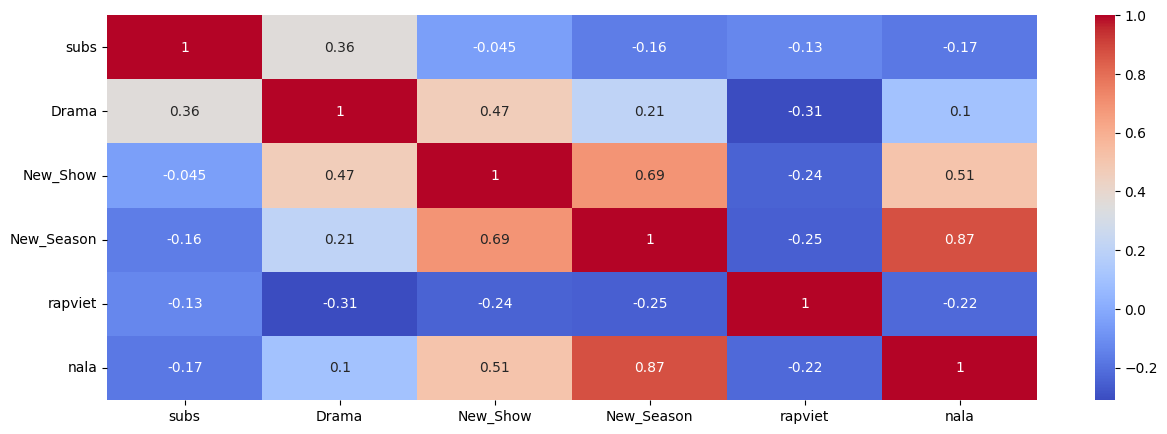

In [66]:
# vẽ heatmap correlation df2
plt.figure(figsize=(15,5))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.show()

In [67]:
feature2 = pd.read_csv('features.csv')
feature2.head()

,Movie_Show,Month_Start,Month_End,Type
0,Nhanh như chớp mùa 3,2020-09,2021-09,comedy
1,7 nụ cười xuân mùa 5,2021-11,2022-03,comedy
2,Ký ức vui vẻ mùa 3,2020-11,2021-05,comedy
3,Cây táo nở hoa,2021-04,2021-09,drama
4,Nhanh như chớp nhí,2020-09,2021-09,comedy


In [68]:
feature2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_Show   32 non-null     object
 1   Month_Start  32 non-null     object
 2   Month_End    32 non-null     object
 3   Type         32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [69]:
feature2['Month_Start'] = pd.to_datetime(feature2['Month_Start'],format='%Y-%m')
feature2['Month_End'] = pd.to_datetime(feature2['Month_End'],format='%Y-%m')
feature2['Movie_Show'] = feature2['Movie_Show'].astype('string')
feature2['Type'] = feature2['Type'].astype('string')

In [70]:
feature2

,Movie_Show,Month_Start,Month_End,Type
0,Nhanh như chớp mùa 3,2020-09-01,2021-09-01,comedy
1,7 nụ cười xuân mùa 5,2021-11-01,2022-03-01,comedy
2,Ký ức vui vẻ mùa 3,2020-11-01,2021-05-01,comedy
3,Cây táo nở hoa,2021-04-01,2021-09-01,drama
4,Nhanh như chớp nhí,2020-09-01,2021-09-01,comedy
5,Những trái tim nhảy nhót,2022-08-01,2022-08-01,drama
6,Anh yêu em được bao lâu,2022-06-01,2022-11-01,drama
7,Khi đàn ông là số 0,2021-03-01,2021-04-01,drama
8,Đứa em thừa kế,2021-04-01,2022-08-01,drama
9,Khi mẹ ra tay,2022-02-01,2022-06-01,drama


In [71]:
# tạo một danh sách các tháng năm từ 2021-01 đến 2023-12
date_list = pd.date_range(start='2021-04-01', end='2023-12-31', freq='D').tolist()

In [72]:
date_list = pd.DataFrame(date_list, columns=['YearMonth'])

In [73]:
date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  1005 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.0 KB


In [74]:
date_list['YearMonth'][1]

Timestamp('2021-04-02 00:00:00')

In [75]:
# thêm cột type vào feature2
date_list['comedy'] = 0
date_list['drama'] = 0
date_list['show'] = 0
date_list['gala'] = 0
date_list['talkshow'] = 0
date_list['gameshow'] = 0
date_list['music'] = 0

# nếu date nằm trong khoảng thời gian của feature2 thì append type vào cột Type
for date in range(len(date_list)):
    for i in range(len(feature2)):
        if date_list['YearMonth'][date] >= feature2['Month_Start'][i] and date_list['YearMonth'][date] <= feature2['Month_End'][i]:
            if feature2['Type'][i] == 'comedy':
                date_list['comedy'][date] += 1
            if feature2['Type'][i] == 'drama':
                date_list['drama'][date] += 1
            if feature2['Type'][i] == 'show':
                date_list['show'][date] += 1
            if feature2['Type'][i] == 'gala':
                date_list['gala'][date] += 1
            if feature2['Type'][i] == 'talkshow':
                date_list['talkshow'][date] += 1
            if feature2['Type'][i] == 'gameshow':
                date_list['gameshow'][date] += 1
            if feature2['Type'][i] == 'music':
                date_list['music'][date] += 1
date_list.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13580\1371598403.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_list['comedy'][date] += 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13580\1371598403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_list['drama'][date] += 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13580\1371598403.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_list['gameshow'][date] += 1
C:\Use

,YearMonth,comedy,drama,show,gala,talkshow,gameshow,music
0,2021-04-01,3,4,0,0,0,1,1
1,2021-04-02,3,3,0,0,0,1,1
2,2021-04-03,3,3,0,0,0,1,1
3,2021-04-04,3,3,0,0,0,1,1
4,2021-04-05,3,3,0,0,0,1,1


In [76]:
date_list.describe()

,comedy,drama,show,gala,talkshow,gameshow,music
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.791045,1.555224,0.645771,0.002985,0.272637,0.213930,0.522388
std,0.771840,0.665143,0.815619,0.054581,0.445537,0.410282,0.559904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000


In [114]:
# date_list.to_csv('date_list.csv', index=False)

In [77]:
sub['date'] = pd.to_datetime(sub['date'],format='%Y-%m-%d')

In [78]:
df3 = sub.merge(date_list, left_on='date', right_on='YearMonth', how='right')
df3.head()

,date,subs,YearMonth_x,YearMonth_y,comedy,drama,show,gala,talkshow,gameshow,music
0,2021-04-01,2973.0,2021-04,2021-04-01,3,4,0,0,0,1,1
1,2021-04-02,2864.0,2021-04,2021-04-02,3,3,0,0,0,1,1
2,2021-04-03,3014.0,2021-04,2021-04-03,3,3,0,0,0,1,1
3,2021-04-04,3118.0,2021-04,2021-04-04,3,3,0,0,0,1,1
4,2021-04-05,2894.0,2021-04,2021-04-05,3,3,0,0,0,1,1


In [79]:
for i in range(len(df3)):
    if(df3['date'].isnull()[i] == True):
        df3['date'][i] = df3['YearMonth_y'][i]

df3.tail()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13580\3115223912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'][i] = df3['YearMonth_y'][i]


,date,subs,YearMonth_x,YearMonth_y,comedy,drama,show,gala,talkshow,gameshow,music
1000,2023-12-27,NaN,NaN,2023-12-27,0,0,0,0,0,0,0
1001,2023-12-28,NaN,NaN,2023-12-28,0,0,0,0,0,0,0
1002,2023-12-29,NaN,NaN,2023-12-29,0,0,0,0,0,0,0
1003,2023-12-30,NaN,NaN,2023-12-30,0,0,0,0,0,0,0
1004,2023-12-31,NaN,NaN,2023-12-31,0,0,0,0,0,0,0


In [80]:
# tạo biến là ngày 2023-09-30
date = pd.to_datetime('2023-06-30',format='%Y-%m-%d')
date2 = pd.to_datetime('2023-02-14',format='%Y-%m-%d')

In [81]:
df3 = df3.drop(['YearMonth_x','YearMonth_y'], axis=1)
df3.tail()

,date,subs,comedy,drama,show,gala,talkshow,gameshow,music
1000,2023-12-27,NaN,0,0,0,0,0,0,0
1001,2023-12-28,NaN,0,0,0,0,0,0,0
1002,2023-12-29,NaN,0,0,0,0,0,0,0
1003,2023-12-30,NaN,0,0,0,0,0,0,0
1004,2023-12-31,NaN,0,0,0,0,0,0,0


In [82]:
df3 = df3[df3['date'] <= date]
df3.tail()

,date,subs,comedy,drama,show,gala,talkshow,gameshow,music
816,2023-06-26,NaN,1,2,2,0,0,0,1
817,2023-06-27,NaN,1,2,2,0,0,0,1
818,2023-06-28,NaN,1,2,2,0,0,0,1
819,2023-06-29,NaN,1,2,2,0,0,0,1
820,2023-06-30,NaN,1,2,2,0,0,0,1


In [83]:
df3.to_csv('dataset.csv', index=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13580\838597939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')


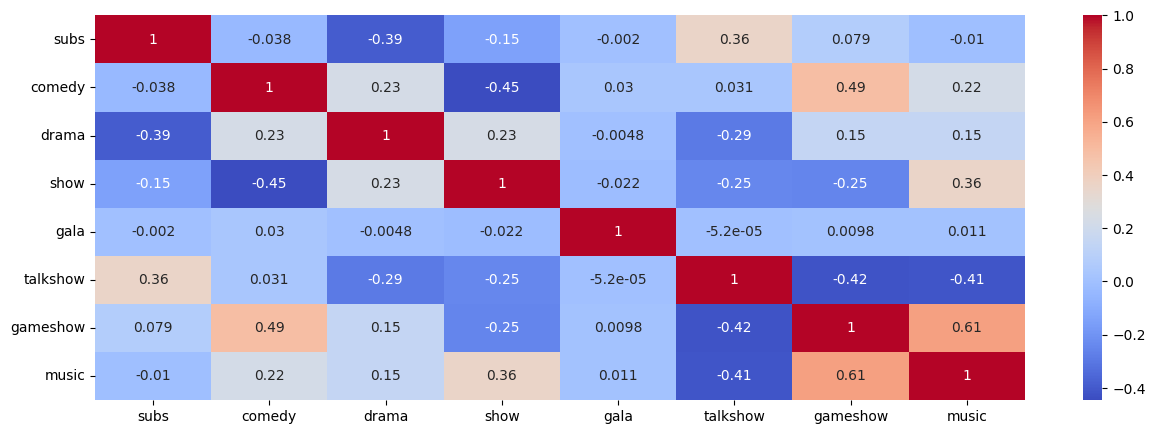

In [84]:
# vẽ heat map df3
plt.figure(figsize=(15,5))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.show()